# Hunting Exoplanets In Space


In the process of creating Pandas DataFrames, we will see how NASA finds the exoplanets in the universe. There are deep Physical and mathematical theories on exploring exoplanets in the space.

---



### Finding Exoplanets Principle

There are billions of galaxies in the universe. These galaxies have millions of stars. One such galaxy is the Milky-way galaxy in which our solar system exists. The solar system has a star called Sun which has its own light. There are 8 planets in our solar system orbiting around the Sun. Similar to this, in some other galaxy there would be a star and probably a planet would be revolving around that star.

Long back, NASA placed a telescope called Kepler telescope in the space. This telescope is used to measure the brightness of the stars in the far-distant galaxies.


<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/kepler-space-telescope.jpg' width="800">

*Image credits: https://www.nasa.gov/feature/ames/kepler/nasa-s-kepler-confirms-100-exoplanets-during-its-k2-mission*

Whenever a planet, while orbiting its star, comes in between the telescope and the star, the brightness of the star recorded by the telescope is lower whereas when the planet goes behind the star, the brightness of the light recorded by the telescope is higher.

This method of detecting exoplanets in far-distant galaxies through the brightness of the light emitted by a star is called the **Transit Method**.

Essentially, if we plot the brightness on the vertical axis and the time on the horizontal axis, then we will see that the brightness of the star recorded by the telescope increases and decreases periodically. Thus, in the graph, we will notice a wave-like pattern. This indicates that the star definitely has at least one planet.

<img src = 'https://s3-whjr-v2-prod-bucket.whjr.online/99a90115-148e-45c6-b9b0-4ac4a5db4e18.gif' width=500 >



The image below shows some of the exoplanets (Kepler 4b to Kepler 8b) discovered by the Kepler space telescope. We can see the brightness level radiated by the star for each planet. The Flux values on the vertical axis represent the brightness level of the star.

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/transit-method.jpg' width='800'>

*Image credits: https://www.nasa.gov/content/light-curves-of-keplers-first-5-discoveries*

As we can see in the image above, the bigger the planet (Kepler 6b), deeper the dip in the brightness level. And, the longer the orbital period of a planet, broader is the width of the dip (Kepler 7b). Kepler 7b has the greatest orbital period of 4.9 days among these 5 planets.

So, this is how NASA finds a planet beyond our solar system. Now, let's use Kepler space telescope dataset to create a Pandas DataFrame in order to find out which stars beyond our solar system have a planet.

---

#### Loading CSV File



In [1]:
# Teacher Action: Read a 'csv' file using the 'read_csv()' function. Also, display the first 5 rows of the DataFrame using the 'head()' function.
# First of all we have to import the Pandas module with pd as an alias (or nickname).
import pandas as pd

exo_train_df = pd.read_csv('exotrain.csv')
exo_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


We have created a Pandas DataFrame for the `exoTrain.csv` file and stored it in the `exo_train_df` variable.

Now, we will create a DataFrame for the `exoTest.csv` file and store it in a variable called `exo_test_df`.

In [2]:
# Reading the 'exoTest.csv' file and display its first 5 rows using the 'head()' function.
exo_test_df = pd.read_csv('exoTest.csv')
exo_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


The two DataFrames have exactly the same type of data.


In [3]:
# Find the number of rows and columns in the 'exo_train_df' DataFrame.
exo_train_df.shape

(5087, 3198)

So, there are 5087 rows and 3198 columns in the `exo_train_df` DataFrame.

In [4]:
# Find the number of rows and columns in the 'exo_test_df' DataFrame.
exo_test_df.shape

(570, 3198)

There are 570 rows and 3198 columns in the `exo_test_df` DataFrame.

---

#### Check For The Missing Values^

In most of the cases, we do not get complete datasets. They either have some values missing from the rows and columns or they do not have standardized values.

So, before going ahead with the analysis, it is a good idea to check whether the dataset has any missing values.

In [5]:
# Check for the missing values using the 'isnull()' function.
exo_train_df.isnull()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5084,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5085,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


There are $5087\times3198=16268226$ values in the DataFrame. It is not feasible to check so many values manually. So, we need a better approach to check for missing values.

We can call the `sum()` function on the `exo_train_df.isnull()` statement. It will return the sum of `True` values for every column in a DataFrame.

In [6]:
# Use the 'sum()' function to find the total number of True values in each column.
exo_train_df.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

We can see that a lot of columns have `0` missing values. But still, we cannot manually see whether all the columns have missing values or not because the list of columns is too long to be seen in this notebook. There are `3198` columns to search.

In [7]:
# View all the columns in the 'exo_train_df' DataFrame.
exo_train_df.columns

Index(['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6',
       'FLUX.7', 'FLUX.8', 'FLUX.9',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3198)


We, again, need a better approach. We will create a variable called `num_missing_values` to store the total number of values that are missing. Then, we will iterate through each column and within each column, we will iterate through each item to check for the missing values. If the `isnull()` function for a column returns `True`, then we will increase the value of the `num_missing_values` by `1` else we will not do anything.

In [8]:
# Iterate through the 'exo_train_df' DataFrame to find the total number of missing values.
num_missing_values = 0
# Here, we have created the num_missing_values which will store all the number of missing values in the DataFrame.

# Now, we will iterate through every column in the DataFrame, then will iterate through every item in each column.
for column in exo_train_df.columns:
  for item in exo_train_df[column].isnull():
    if item == True:
      num_missing_values += 1

num_missing_values

0

As seen, there are no missing values in the DataFrame because the final value of the `num_missing_values` is `0`.

Now let's find the number of non missing values by replacing `True` with `False` in the above code and store it in variable `non_missing_values`.

In [9]:
# In the above code replace 'True' with 'False' and get the number of non missing values.
non_missing_values = 0
for column in exo_train_df.columns:
  for item in exo_train_df[column].isnull():
    if item == False:
      non_missing_values += 1

non_missing_values

16268226

As we can see, the output is 16,268,226. It is the sum of all the values which are False. That means there are no missing values because the total number of values in the `exo_train_df` is 16,268,226 which is exactly the same as the total number of non-missing values.

---

#### Slicing A DataFrame Using The `iloc[]` Function

 We want to plot the scatter plots and line plots for 6 stars. For each of these stars we will create a Pandas series which will have the brightness levels starting from `FLUX.1` to `FLUX.3197`.

 Effectively, we need to create 6 Pandas series.

Let's create a Pandas series for the first star in the `exo_train_df`. Let's store the series in a variable called `star_0`. To do this, we need to use the `iloc` function.

In [10]:
# Create a Pandas series from a Pandas DataFrame using the 'iloc[]' function.
star_0 = exo_train_df.iloc[0, :]
star_0

LABEL         2.00
FLUX.1       93.85
FLUX.2       83.81
FLUX.3       20.10
FLUX.4      -26.98
             ...  
FLUX.3193    92.54
FLUX.3194    39.32
FLUX.3195    61.42
FLUX.3196     5.08
FLUX.3197   -39.54
Name: 0, Length: 3198, dtype: float64

In [11]:
# Using the 'iloc[]' function, create a Pandas series for the second star and storing it in a variable called 'star_1'.
star_1 = exo_train_df.iloc[1, :]
star_1.head()

LABEL      2.00
FLUX.1   -38.88
FLUX.2   -33.83
FLUX.3   -58.54
FLUX.4   -40.09
Name: 1, dtype: float64

In [12]:
#Using the 'iloc[]' function, create a Pandas series for the third star and storing it in a variable called 'star_2'.
star_2 = exo_train_df.iloc[2, :]
star_2.head()

LABEL       2.00
FLUX.1    532.64
FLUX.2    535.92
FLUX.3    513.73
FLUX.4    496.92
Name: 2, dtype: float64

We have created a Pandas series for each of the first three stars. Now, let's create the same for each of the last three stars in the DataFrame.

In [13]:
#Displaying the last 5 rows of the 'exo_train_df'
exo_train_df.tail()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55
5086,1,323.28,306.36,293.16,287.67,249.89,218.30,188.86,178.93,118.93,...,71.19,0.97,55.20,-1.63,-5.50,-25.33,-41.31,-16.72,-14.09,27.82


In [14]:
# Creating a Pandas series for the last star
star_5086 = exo_train_df.iloc[5086, :]
star_5086.head()

LABEL       1.00
FLUX.1    323.28
FLUX.2    306.36
FLUX.3    293.16
FLUX.4    287.67
Name: 5086, dtype: float64

In [15]:
# creating a Pandas series for the second-last star
star_5085 = exo_train_df.iloc[5085, :]
star_5085.head()

LABEL     1.00
FLUX.1    3.82
FLUX.2    2.09
FLUX.3   -3.29
FLUX.4   -2.88
Name: 5085, dtype: float64

In [16]:
# creating a Pandas series for the third-last star
star_5084 = exo_train_df.iloc[5084, :]
star_5084.head()

LABEL       1.00
FLUX.1    273.39
FLUX.2    278.00
FLUX.3    261.73
FLUX.4    236.99
Name: 5084, dtype: float64



We will create **scatter plots** and **line plots** to visualise the fluctuations in the brightness levels (or flux values) of the light emitted by the stars.

- If there is a periodic dip in the brightness levels, then we can say that the star has at least one planet. This star is labelled as `2`.

-  If there is no clear periodic dip in the brightness levels, then we could say that the star has no planet. In the datasets, such stars are labelled as `1`.

The `exo_train_df` has 5087 rows and 3198 columns. Each row denotes a star. The `LABEL` column tells the label or the classification of the star, i.e., whether it has at least one planet or at most one planet. The remaining 3197 columns, i.e., the columns `FLUX.1` to `FLUX.3197` contain the brightness levels for each star. A brightness level is a floating-point value which could be either positive, negative or zero.

We will create the scatter plots and line plots for three stars labelled as `2` and three stars labelled as `1`.


## Scatter and Line Plots of Flux

Now that we have Pandas series for the 3 stars labelled as 2 and 3 stars labelled as 1, let's plot the Flux values on the  y−axis  for each observation for a star. On  x−axis , we will plot numbers ranging from 1 to 3197.

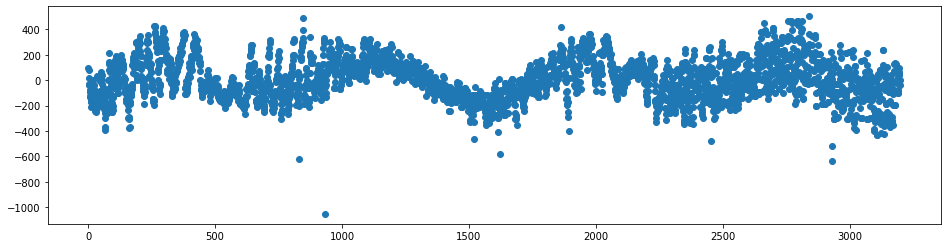

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))

# x is a Pandas series of numbers between 1 and 3197 and y is the 'FLUX' values for a star.
x_values_star_0 = np.arange(1, 3198)
y_values_star_0 = star_0[1:]
plt.scatter(x_values_star_0, y_values_star_0)

plt.show()

As we can see from the graph, there is a somewhat periodic downward peak in the brightness level recorded by the Kepler telescope for this star. This suggests that the first star in the DataFrame has at least one planet.

Let's draw the line plot also to see this fluctuation in a different manner.

The line plot also confirms the periodic downward-peaks in the FLUX values.

In [ ]:
# Line plot for the first star in the DataFrame.
plt.figure(figsize=(18, 6))

# Call the plot(x, y) function to draw a line plot between the x and y values.
plt.plot(x_values_star_0, y_values_star_0)
plt.show()

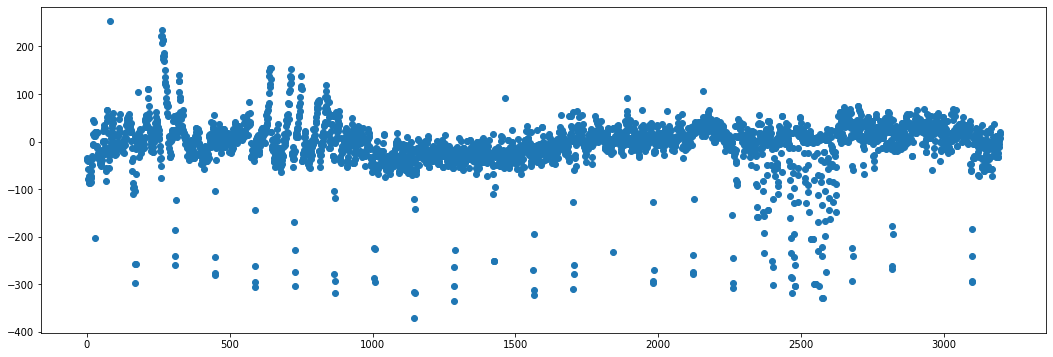

In [19]:
# Create a scatter plot for the second star, i.e., 'star_1'.
plt.figure(figsize=(18, 6))

x_values_star_1 = np.arange(1, 3198)
y_values_star_1 = star_1[1:]

plt.scatter(x_values_star_1, y_values_star_1)
plt.show()

It is quite difficult to spot any clear pattern in the scatter plot for the second star in the DataFrame. Let's draw a line plot to identify a pattern.

In [ ]:
# Create a line plot for the second star, i.e., 'star_1'.
plt.figure(figsize=(18, 6))
plt.plot(x_values_star_1, y_values_star_1)
plt.show()

As we can see, there are consistent sudden drops in the brightness levels for the second star in the DataFrame. This suggests that the planet is orbiting its star at very high radial speed. Also, the planet could be very close to the star.

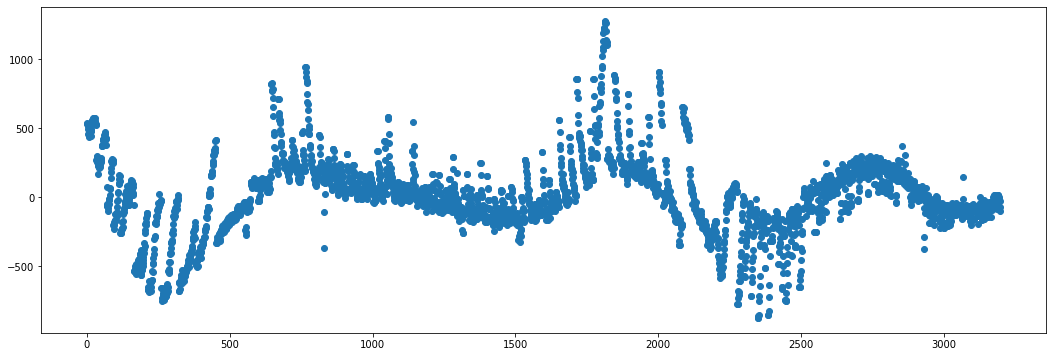

In [20]:
# Create a scatter plot for the third star, i.e., 'star_2'.
plt.figure(figsize=(18, 6))

x_values_star_2 = np.arange(1, 3198)
y_values_star_2 = star_2[1:]

plt.scatter(x_values_star_2, y_values_star_2)
plt.show()

Here also, we can spot a clear repetitive downward-peaks which confirms that the star has at least one planet.

In [ ]:
# Create a line plot for the third star, i.e, 'star_2'.
plt.figure(figsize=(18, 6))
plt.plot(x_values_star_2, y_values_star_2)
plt.show()

The line plot also confirms the repetitive downward-peak pattern.

## Scatter Plots And Line Plots For Last 3 Stars

Now, let's create the scatter plots and line plots for the last three stars in the DataFrame which have been labelled or classified as 1.

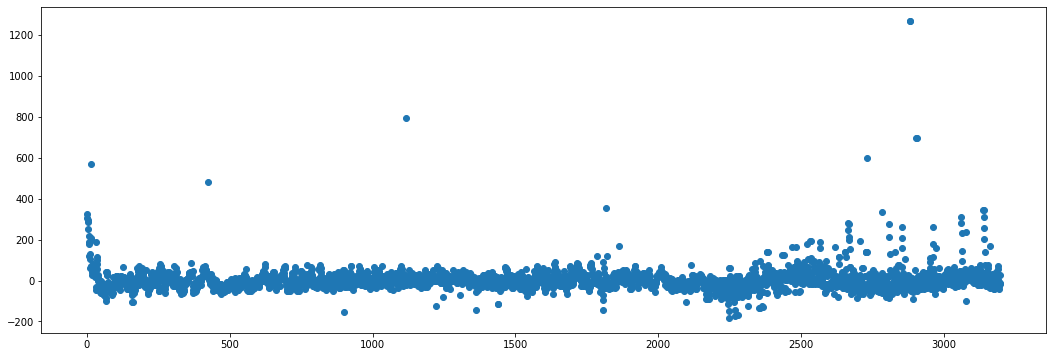

In [21]:
# Create a scatter plot for the last star, i.e., 'star_5086' in the DataFrame.
plt.figure(figsize=(18, 6))

x_values_star_5086 = np.arange(1, 3198)
y_values_star_5086 = star_5086[1:]

plt.scatter(x_values_star_5086, y_values_star_5086)
plt.show()

As you can see, there is no clear periodic downward-peak in the brightness levels of the light emitted from the star. We cannot make a claim that the star has a planet orbiting it. Let's also create the line plot to confirm our inference.

In [ ]:
# Create a line plot for the last star, i.e, 'star_5086' in the DataFrame.
plt.figure(figsize=(18, 6))
plt.plot(x_values_star_5086, y_values_star_5086)
plt.show()

There are some sudden spikes in the line plot but they exist at irregular intervals. So we cannot say for sure that the star has a planet.

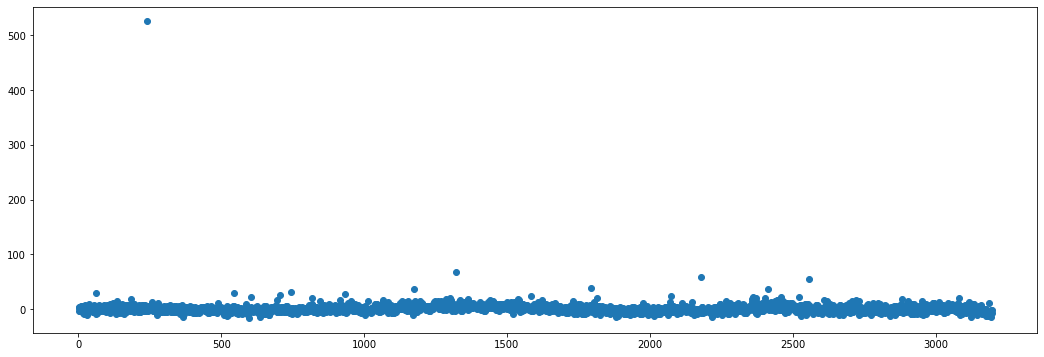

In [22]:
# Create a scatter plot for the second-last star, i.e., 'star_5085' in the DataFrame.
plt.figure(figsize=(18, 6))

x_values_star_5085 = np.arange(1, 3198)
y_values_star_5085 = star_5085[1:]

plt.scatter(x_values_star_5085, y_values_star_5085)
plt.show()

There is no clear periodic downward-peak pattern in the FLUX values for the second-last star.

In [ ]:
# Create a line plot for the second-last star in the DataFrame.
plt.figure(figsize=(18, 6))
plt.plot(x_values_star_5085, y_values_star_5085)
plt.show()

The line-plot also confirms that there is no clear periodic downward-peak pattern in the FLUX values.

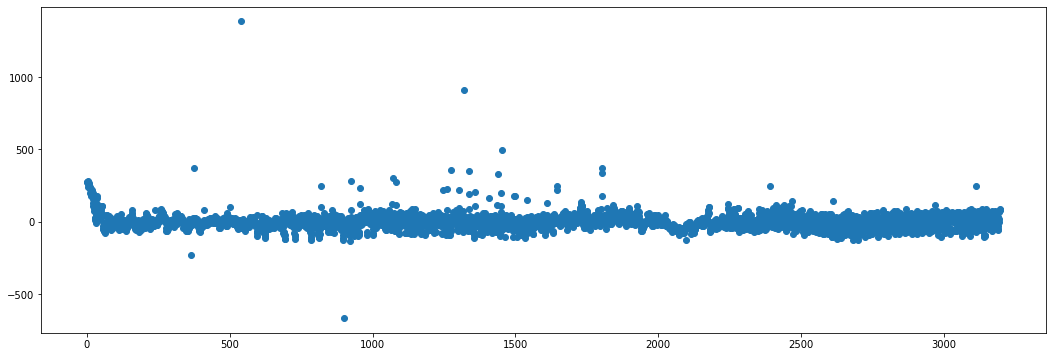

In [23]:
# Create a scatter plot for the third-last star, i.e., 'star_5084' in the DataFrame.
plt.figure(figsize=(18, 6))

x_values_star_5084 = np.arange(1, 3198)
y_values_star_5084 = star_5084[1:]

plt.scatter(x_values_star_5084, y_values_star_5084)
plt.show()

No clear periodic downward-peak pattern for the third-last star.

In [ ]:
# Create a line plot for the third-last star in the DataFrame.
plt.figure(figsize=(18, 6))
plt.plot(x_values_star_5084, y_values_star_5084)
plt.show()

## Deploying A Prediction Model

We will deploy a prediction model to predict which stars in the test dataset have a planet and which do not.

Our prediction model should classify the stars either as 1 or 2. Let's find out how many stars in the test dataset are classified as 1 and 2.

In [24]:
#Count the number of times a value occurs in a Pandas series.
exo_test_df['LABEL'].value_counts()

LABEL
1    565
2      5
Name: count, dtype: int64

There are 565 stars which are classified as 1 and 5 stars classified as 2 which means only 5 stars have a planet.

The ultimate goal of the Kepler space telescope is to detect exoplanets in outer space. Hence, a machine learning model, based on some data should also correctly detect stars having planets. This means a prediction model will be considered useful if it correctly detects almost all the stars having a planet.

Now, we are going to deploy the Random Forest Classifier model so that it can detect all the five (or at least three) stars having a planet.

## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Target & Feature Variables Separation
x_train = exo_train_df.iloc[:, 1:]
x_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [26]:
y_train = exo_train_df.iloc[:, 0]
y_train.head()

0    2
1    2
2    2
3    2
4    2
Name: LABEL, dtype: int64

In [27]:
#Fitting The Model
rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=50)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_train, y_train)

1.0

As seen, we have deployed the RandomForestClassifier model with an accuracy of 100%

In [28]:
#Target & Feature Variables From Test Dataset
x_test = exo_test_df.iloc[:, 1:]
x_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [29]:
y_test = exo_test_df.iloc[:, 0]
y_test.head()

0    2
1    2
2    2
3    2
4    2
Name: LABEL, dtype: int64

In [30]:
#Make predictions on the test dataset 
y_predicted = rf_clf.predict(x_test)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

The actual target values are stored in a Pandas series. So, for the sake of consistency, let's convert the NumPy array of the predicted values into a Pandas series.

In [31]:
#Convert the NumPy array of predicted values into a Pandas series.
y_predicted = pd.Series(y_predicted)
y_predicted.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [32]:
#count the number of stars classified as 1 and 2.
y_predicted.value_counts()

1    570
Name: count, dtype: int64

As seen, we did not get the expected results. The model should have classified all the stars having a planet as 2. Ideally, the Random Forest Classifier model should have classified 565 values as 1 and the remaining 5 values as 2.

In this case, even though the accuracy of a prediction model is high but according to the problem statement, it is not giving the desired result. Hence, accuracy alone is not the metric to test the efficacy of a prediction model.

We need to ensure that for any kind of uneven distribution of data in the test dataset, our model should make accurate predictions. For this purpose, we need to evaluate the model that we deployed.

Generally, a classification model (in this case, Random Forest Classification) is evaluated through a concept called confusion matrix.

In [33]:
#Import the 'confusion_matrix' and 'classification_report' functions from the 'sklearn.metrics' module.
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_predicted)
#Precision And Recall & f1-score
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

As seen, the precision and f1-score values are reported as 0.00 for class 2 because they are actually undefined values.

Ideally, the above values for class 2 should also be close to 1.00. Then only we can say that our prediction model is satisfactory.

Based on these three parameters, we concluded that our model needs a lot of improvement because it did not classify the stars having a planet as 2 rather it labelled every star as 1.
Now on, we will process the data before deploying a prediction model so that it can learn the properties of the different stars through the training dataset.

## Data Normalisation

In [34]:
#Get the data description 
exo_train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


As seen, the values in the FLUX.1 column range between -227,856.3 (minimum FLUX.1 value) and 1,439,240 (maximum FLUX.1 value).
 

In the FLUX.1 column, the difference in the maximum and minimum values, i.e.,

1,439,240−(−227,856.3)=1,667,096.3 

is huge because of the  105  and  106  scales.

Similarly, the data in all the other FLUX columns also vary a lot because they lie on a huge scale. 

In [35]:
#function to normalise a Pandas series using the mean normalisation method.
def mean_normalise(series):
  norm_series = (series - series.mean()) / (series.max() - series.min())
  return norm_series

In [36]:
#Apply the 'mean_normalise' function horizontally on the training DataFrame.
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_train_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590


All the data-points are on the same scale after mean normalisation. Notice that we didn't normalise the LABEL data as we intended.

In [37]:
#add the 'LABEL' column to the 'norm_train_df' DataFrame.
norm_train_df.insert(loc=0, column='LABEL', value=exo_train_df['LABEL'])

# After inserting the 'LABEL' column to the 'norm_train_df' DataFrame, print its first five rows.
norm_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590


In [38]:
# Apply the 'mean_normalize()' function on the testing DataFrame
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_test_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,...,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,...,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,...,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,...,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,...,-0.006247,-0.016795,-0.001531,0.001095,-0.004439,-0.027127,-0.025421,-0.016852,-0.020089,0.002564


In [39]:
#add the 'LABEL' column to the 'norm_test_df' DataFrame.
norm_test_df.insert(loc=0, column='LABEL', value=exo_test_df['LABEL'])
norm_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,...,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,...,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,...,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,...,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,...,-0.006247,-0.016795,-0.001531,0.001095,-0.004439,-0.027127,-0.025421,-0.016852,-0.020089,0.002564


In [40]:
exo_train_df.T

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,...,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,...,3.80,-10.69,86.29,-20.12,-46.29,-24.45,38.03,65.73,-4.65,-41.31
FLUX.3195,61.42,6.46,-28.91,-17.31,-384.65,-41.63,-11.77,-10.62,26.94,3648.34,...,16.33,-9.54,13.06,-14.41,-3.08,-17.00,100.28,88.42,-14.55,-16.72
FLUX.3196,5.08,16.00,-70.02,-17.35,-411.79,-52.90,-9.25,-112.02,34.08,3671.97,...,27.35,-2.48,161.22,-43.35,-28.43,3.23,-45.64,79.07,-6.41,-14.09


## Fast Fourier Transformation

The line plot for the star_0 Pandas series, graph has a wave-like pattern with periodic downward peaks. As the value on the  x−axis  increases, the FLUX values on the  y−axis  periodically increase and decrease.

In [ ]:
# line plot for the first star 'star_0' in the 'norm_train_df' DataFrame.
# import modules
import numpy as np
import matplotlib.pyplot as plt

# Create a Pandas series 'star_0' for the first star in the 'norm_train_df' Dataframe
star_0 = norm_train_df.iloc[0, 1:]

# Create a line plot for 'star_0'
plt.figure(figsize=(20, 5))
plt.plot(np.arange(1, 3198), star_0)
plt.grid()
plt.show()

So there is a clear fluctuation in the FLUX values which drops,

    
whenever a planet comes between its star and the Kepler telescope while orbiting the st r a
    

whenever the planet goes behind the star (as observed by Kepler telescope) while orbiting the 


We may observe the fluctuations in the brightness level. However, we need to find out whether these fluctuations are periodic i.e. whether they are occuring after every fixed interval. If these fluctuations are periodic, then we can say that the star has at least one planet.

Thus, to identify whether increase or decrease in the brightness level is periodic or not, we will use Fourier Transformation

We e can get the frequencies of the planets revolving around its star. Our predict model (Random Forest Classifier) can capture these frequencies while learning from the training data. Thus, allowing the prediction model to make accurate predictions.. star

In [43]:
#Apply the 'fft.fft()' function on the 'star_0' Pandas series.
fft_star_0 = np.abs(np.fft.fft(star_0))
fft_star_0

array([6.00470566e-15, 2.27324760e+00, 3.57228832e+01, ...,
       3.39782358e+01, 3.57228832e+01, 2.27324760e+00])

### Plotting Fourier Transformed values for star_0

In [44]:
freq = np.fft.fftfreq(len(star_0))  # This will generate 3197 frequencies
freq

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

Note that the above frequency array generated using fft.fftfreq() function will not only be used for plotting star_0 but for all stars. This is because, the fft.fftfreq() function output depends on the length of the array/series and the pandas series of all the stars have same length.

Now, let's plot the Fourier transformed values with the frequency values for the star_0 Pandas series.

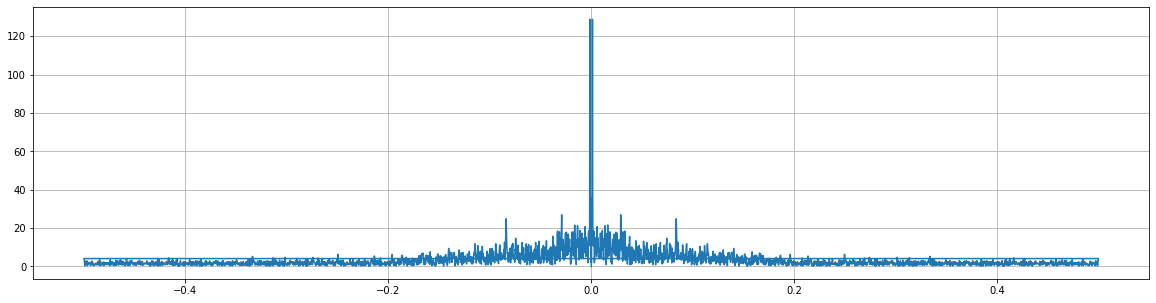

In [45]:
#Create a line plot between the 'freq' and 'fft_star_0' values.
plt.figure(figsize=(20, 5))
plt.plot(freq, fft_star_0)
plt.grid()
plt.show()


The 5 tall peaks in the above graph:

1. At `-0.08` (approx)

2. At `-0.03` (approx)

3. At `0.00`

4. At `0.03` (approx)

4. At `0.08` (approx)

Notice that the above plot is symmetric. So, either we can consider the left-half of the graph or the right-half. They both mean the same thing. Also, there is a huge spike close to `0`. It denotes that `star_0` has a frequency very close to `0`.

The above graph has been plotted for 3197 values.
If we plot the above graph for the first 10 values only, then we will be able to observe the peak very closely.

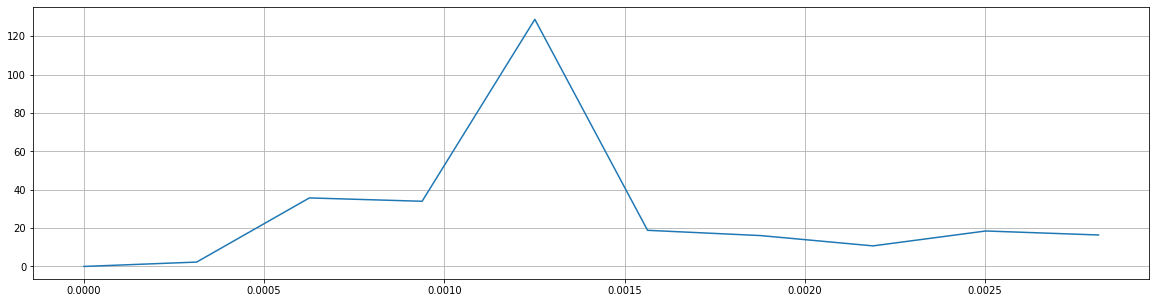

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(freq[:10], fft_star_0[:10])
plt.grid()
plt.show()

As seen, the peak lies at some point between 0.001 and 0.0015, i.e. at 0.00125.

In [47]:
#Create a function and name it 'fast_fourier_transformation()' to apply Fast Fourier Transformation on the DataFrames.
import numpy as np

def fast_fourier_transform(star):
  fft_star = np.fft.fft(star, n=len(star))
  return np.abs(fft_star)

In [48]:
#Apply the 'fast_fourier_transform' function on the transposed 'norm_train_df' DataFrame.

# Here, we first take the transpose of the DataFrame and then apply the fast_fourier_transform vertically. So axis = 0 is specified here.
x_fft_train_T = norm_train_df.iloc[:, 1:].T.apply(fast_fourier_transform, axis=0)

# After transforming the 'FLUX' values, we again take the transpose.
x_fft_train = x_fft_train_T.T

x_fft_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.004706e-15,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,...,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.094300e-15,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,...,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,3.742374e-15,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,...,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,8.024386e-15,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,...,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,4.881195e-15,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,...,4.923027,69.375686,36.451207,28.957862,116.738548,103.842855,148.627668,146.597215,51.382781,113.576655




Now, let's plot the line plots for the stars `34` to `40` to see observe the frequency variations.
- The stars in the rows `34` to `36` are the ones having a planet
- The stars beyond the row `37` are the ones not having a planet.

In [ ]:
#Create line plots for the transformed Pandas series for the stars 34 to 41 in the 'x_fft_train' DataFrame.
for i in range(34, 41):
  plt.figure(figsize=(20, 5))
  plt.xlabel(str(i)) 
  plt.ylabel('Flux') 
  plt.plot(freq, x_fft_train.iloc[i, :])
  plt.show()

The prediction model later, when deployed, should look for the different frequency pattern for different stars. Based on these patterns, it should classify whether a star has a planet or not.
A apply the fast_fourier_transform() function on the norm_test_df FLUX values only. 

In [50]:
#Apply the 'fast_fourier_transform()' function on the transposed 'norm_test_df' DataFrame.
x_fft_test_T = norm_test_df.iloc[:, 1:].T.apply(fast_fourier_transform)
x_fft_test = x_fft_test_T.T
x_fft_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,8.950904e-16,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,...,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,8.965352e-15,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,...,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,1.369225e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,...,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,2.373386e-15,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,...,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,6.684428e-15,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,...,5.167375,8.501530,14.800046,30.233859,17.985758,39.681676,27.841397,12.808132,11.941614,7.138386


Create the line plots for the stars in the rows 3 to 7 in the transformed test DataFrame

In [ ]:
for i in range(3, 8):
  plt.figure(figsize=(20, 5))
  plt.xlabel(str(i))
  plt.ylabel('Flux')
  plt.plot(freq, x_fft_test.iloc[i, :])
  plt.show()

Now that we have applied Fourier transformation, our prediction model should be able to recognise the different frequency patterns for different stars and hopefully should be able to classify the stars correctly as required.

Right now there are only 37 class 2 and 5050 class 1 values because of which the exo_train_df DataFrame is highly imbalanced.

Now we need synthesize (or manufacture) the artificial data points in a dataset by applying an oversampling technique.

In the case of the exoplanets dataset, class `1` is a majority class because the dataset contains the maximum number of stars not having a planet.


The `exo_train_df` dataset has a total of `5087` stars in which only `37` stars have a planet and the remaining `5050` stars don't have a planet. The percentage of stars having a planet is
$\frac{37 \times 100}{5087} = 0.727$
% which is very low. Hence, the training dataset is highly imbalanced.

The test dataset is also highly imbalanced because out of 570 data points, it contains only 5 stars labelled as class 2.
So, the percentage of class `2` data points is
$\frac{5 \times 100}{570} = 0.877$
% which is also very low. Thus, the test dataset is also highly imbalanced.

#### Oversampling For Classification Problems - SMOTE

There are 3 different methods to synthesize the artificial data points for a classification problem. They are:

1. Random oversampling

2. SMOTE

3. ADASYN

We will apply the SMOTE method to synthesize the artificial data points in the training dataset

In [52]:
#Get the 'y_train' and 'y_test' series from the 'norm_train_df' and 'norm_test_df' DataFrames respectively.
y_train = norm_train_df['LABEL']
y_test = norm_test_df['LABEL']

In [ ]:
# Import the 'SMOTE' module from the 'imblearn.over_sampling' library.
from imblearn.over_sampling import SMOTE

# Call the 'SMOTE()' function with 'ratio=1' as input
smote = SMOTE(sampling_strategy=1)

# Call the 'fit_sample()' function with 'x_fft_train' and 'y_train' datasets as inputs.
x_fft_train_res, y_fft_train_res = smote.fit_resample(x_fft_train, y_train)

In [ ]:
# Check the type and shapes of the 'x_fft_train_res' and 'y_fft_train_res' datasets.
print(type(x_fft_train_res), x_fft_train_res.shape)
print(type(y_fft_train_res), y_fft_train_res.shape)

We now have `10100` data points for the training dataset containing `5050` class `1` values and `5050` class `2` values.

Let's verify it by using the `sum()` function.

In [ ]:
y_fft_train_res.value_counts()

As seen, both the classes, i.e., 1 and 2 appear the equal number of times in the y_fft_train_res DataFrame.

Now, let's deploy the Random Forest Classifier prediction model again to see if the prediction model is able to identify the stars having a planet in the test dataset.

In [56]:
#Import the required modules from the 'sklearn.ensemble' and 'sklearn.metrics' libraries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Deploy the random Forest Classifier prediction model.
rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=50)

rf_clf.fit(x_fft_train_res, y_fft_train_res)
print(rf_clf.score(x_fft_train_res, y_fft_train_res))

y_pred = rf_clf.predict(x_fft_test)
y_pred

Let's make the confusion matrix and classification report to test the efficacy of the model.

In [ ]:
#Create the confusion matrix using the 'y_test' and 'y_pred' values as inputs.
cm = confusion_matrix(y_test, y_pred)
cm

As you can see, the value in the second row and the second column is `0` which means the Random Forest Classifier model has failed to detect class `2` values. Thus, it failed to detect the stars having a planet.

Hence, this will lead to undefined precision, recall and f1-score values. Let's verify it by printing the classification report.

In [ ]:
print(classification_report(y_test, y_pred))

So, even after processing the data with normalisation, Fast Fourier Transformation and oversampling, the Random Forest Classifier prediction model has failed to detect the stars having a planet. One of the possible reasons for the failure of the Random Forest Classifier model could be its inability to form a right decision tree (recall that random forest is a collection of decision trees). This suggests that maybe we have to further process the data or we might have to apply a different prediction model.

Let's deploy the XGBoost Classifier model to see if it can detect the stars having a planet. If it successfully detects the class 2 values, then it means the XGBoost Classifier model is a more appropriate model here to make prediction compared to the Random Forest Classifier model. If not, then we will have to further process the data and then deploy the classification models again.

In [ ]:
#Deploy the XGBoost Classifier model to detect the stars having a planet.
import xgboost as xg
#The current updated version of the XG Boost package makes it mandatory for the label data to start from 0.
#Hence, the LabelEncoder will be used to replace the [1,2] values in 'y_fft_train_res' with [0,1]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# Call the 'XGBClassifier()' function
model = xg.XGBClassifier()

# Call the 'fit()' function with the 'x_fft_train_res' and 'y_fft_train_res' NumPy arrays as input.
#The le.fit_transform() will be used to transform the 'y_fft_train_res' values to [0,1] to ensure 'XGBClassifier()' doesnot throw a value error
model.fit(x_fft_train_res, le.fit_transform(y_fft_train_res))

# Make predictions on test data by calling the 'predict()' function with 'x_fft_test' data as input.
y2_pred = model.predict(x_fft_test)

# Predict the values of predicted values.
y2_pred

Now that we have got the predicted values, let's create a confusion matrix to check if the XGBoost Classifier model has detected any class 2 values in the test dataset.

In [ ]:
#Create the confusion matrix using the 'y_test' and 'y2_pred' values as inputs.
cm2 = confusion_matrix(y_test, y2_pred)
cm2

As seen, the value in the second row and the second column is greater than `0`. Hence, the XGBoost Classifier prediction model has successfully detected few stars belonging to class `2`.However, it has also classified few stars as `1` which should also have been classified as `2`. Nonetheless, this is a great achievement because out of `570` stars in the test dataset, only `5` of them have a planet. 

Now, let's compute the precision, recall and f1-scores to test the efficacy of the XGBoost Classifier model. If the f1-score value is greater than 0.5, then we have a good classification model.

In [ ]:
print(classification_report(y_test, y2_pred))

## Conclusion
As you can see, the precision, recall and f1-scores for the class 2 values are quite high. The closer they are to ONE, the better is the classification model.

This is not the best classification model, but it is a fairly good one. So, we don't have to further process the data. The three data processing activities, i.e., mean normalisation, Fourier Transformation and Oversampling are good enough for this problem statement wherein we hunt the exoplanets in space.